In [3]:
import xgi
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd

# Class

In [4]:
class GrowingHypergraph:
    def __init__(self, H, labels, p, q, num_ext, num_new):
        self.H = H
        self.labels = labels
        self.p = p
        self.q = q
        self.num_ext = num_ext
        self.num_new = num_new
    
    def add_hyperedge(self):
        e_prime = [] # create an empty new edge called e_prime

        ## randomly select an existing hyperedge e to start with
        e_num = random.randint(0, self.H.num_edges - 1)
        e = self.H.edges.members()[e_num]
        e_size = self.H.edges.size.asdict().get(e_num)

        ## randomly select a node u from e
        u_num = random.randint(0, e_size - 1)
        u = list(e)[u_num]
        u_label = self.H.nodes.attrs.asdict().get(u).get("label")
        e_prime.append(u)

        ## add other nodes from e to e_prime
        # add node with same label as u with prob p
        # add node with different label from u with prob q
        for node in e:
            if self.H.nodes.attrs.asdict().get(node).get("label") == u_label:
                prob = self.p
            else:
                prob = self.q
            if random.random() < prob:
                e_prime.append(node)
        
        ## add exterior nodes
        for i in range(0, self.num_ext):
            if len(list(self.H.nodes - e)) > 0:
                exterior_node = random.sample(list(self.H.nodes - e), 1)[0] # randomly sample a node from outside the existing hyperedge
                e_prime.append(exterior_node)
            # else:
            #     print("No remaining exterior nodes, one failed to add")

        ## add new nodes
        for i in range(0, self.num_new):
            new_node = len(self.H.nodes) + 1
            self.H.add_node(new_node)
            new_label = np.random.choice([self.labels[0], self.labels[1]])
            self.H.set_node_attributes({new_node : new_label}, name = "label")
            e_prime.append(new_node)

        self.H.add_edge(e_prime)

# Instance of Growing Hypergraph

Create hypergraph and add edges

In [8]:
H = xgi.Hypergraph([[0,1]])
H.set_node_attributes({0 : 0, 1 : 1}, name = "label")
GH = GrowingHypergraph(H, [0,1], 0.7, 0.5, 1, 1)
for i in range(0, 100):
    GH.add_hyperedge()

Check that the edges were indeed added

(<Axes: >,
 (<matplotlib.collections.PathCollection at 0x283471e40>,
  <matplotlib.collections.PatchCollection at 0x2822ca2c0>))

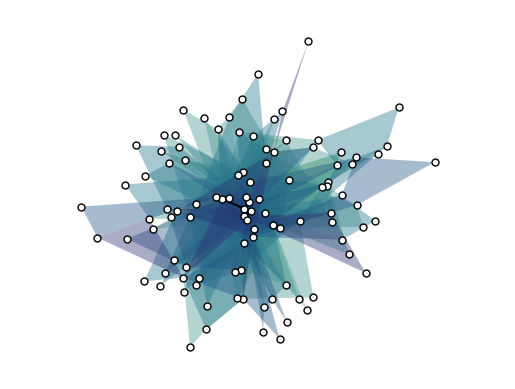

In [11]:
xgi.draw(GH.H, node_size = 5)